Predictions from running the LSTM and RNN models in google collab were downloaded to csvs.

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

RNNpredict = pd.read_csv('model_result/modelRNNresults.csv')
simplelstmpred = pd.read_csv('model_result/simplelstmresults.csv')
deeplstmpred = pd.read_csv('model_result/deeplstmresults.csv')
convpred = pd.read_csv('model_result/convlayerresults.csv')
df = pd.read_csv('data/re_fixed_multivariate_timeseires.csv')

In [239]:
convpred['difference_percentage'] = np.abs(convpred['difference']) /(convpred['actual'])*100
mape = 100 * (convpred['difference'] / convpred['actual'])
accuracy = 100 - np.mean(mape[np.isfinite(mape)])
100 - accuracy

22.449276959447715

In [240]:
deeplstmpred['difference_percentage'] = np.abs(deeplstmpred['difference']) /(deeplstmpred['actual'])*100
mape = 100 * (deeplstmpred['difference'] / deeplstmpred['actual'])
accuracy = 100 - np.mean(mape[np.isfinite(mape)])
100 - accuracy

17.049795994408825

In [241]:
simplelstmpred['difference_percentage'] = np.abs(simplelstmpred['difference']) /(simplelstmpred['actual'])*100
mape = 100 * (simplelstmpred['difference'] / simplelstmpred['actual'])
accuracy = 100 - np.mean(mape[np.isfinite(mape)])
100 - accuracy

8.914036352081624

In [242]:
RNNpredict['difference_percentage'] = np.abs(RNNpredict['difference']) /(RNNpredict['actual'])*100
mape = 100 * (RNNpredict['difference'] / RNNpredict['actual'])
accuracy = 100 - np.mean(mape[np.isfinite(mape)])
100 - accuracy

8.13659988416731

In [89]:
df = pd.read_csv('re_fixed_multivariate_timeseires.csv')
df.drop(df.loc[df['datetime'].duplicated()].index, inplace = True)
df['datetime'] = pd.to_datetime(df['datetime'])

# df = df.sort_values(df['datetime'], ascending=[True])


df.set_index(df['datetime'], inplace = True)
df.drop(columns = [ 'datetime'], inplace = True)

### I have to perform the following in order to unscale the values from the scaler used in the other notebook

In [118]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df)

data = scaled_df.values

In [90]:
n_steps = 168
series_reshaped =  np.array([data[i:i + (n_steps+24)].copy() for i in range(len(data) - (n_steps+24))])

In [91]:
X_train = series_reshaped[:43800, :n_steps]
X_valid = series_reshaped[43800:52560, :n_steps]
X_test = series_reshaped[52560:, :n_steps]
Y = np.empty((61134, n_steps, 24))

for step_ahead in range(1, 24 + 1):
    Y[..., step_ahead - 1] = series_reshaped[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:43800]
Y_valid = Y[43800:52560]
Y_test = Y[52560:]

In [138]:
def scaler(x):
    minimum = x.min()
    maximum = x.max()
    standardized = (x-minimum)/(maximum-minimum)
    return(standardized)

#Split data into X, Y and condition (X are the "features", Y is the forecasted/predicted price or "target")
Y = df['GBP/mWh']
yma = Y.max() #before scaler transform, get mean to inverse scaler transform after model
ymin = Y.min() #before scaler transform, get stdev
Y = scaler(Y) #scale (i.e. condition/transform) forecasted price data


In [140]:
Y_pred = RNNpredict['predictions']
Y_act = RNNpredict['actual']

### Inversing the transformation

In [142]:
Y_pred_inverse = (Y_pred * (yma - ymin) + ymin)
Y_act_inverse =  (Y_act * (yma - ymin) + ymin)

In [149]:
plotting = pd.DataFrame(Y_act_inverse)
plotting['prediction'] = Y_pred_inverse

plotting.sort_index(inplace = True)

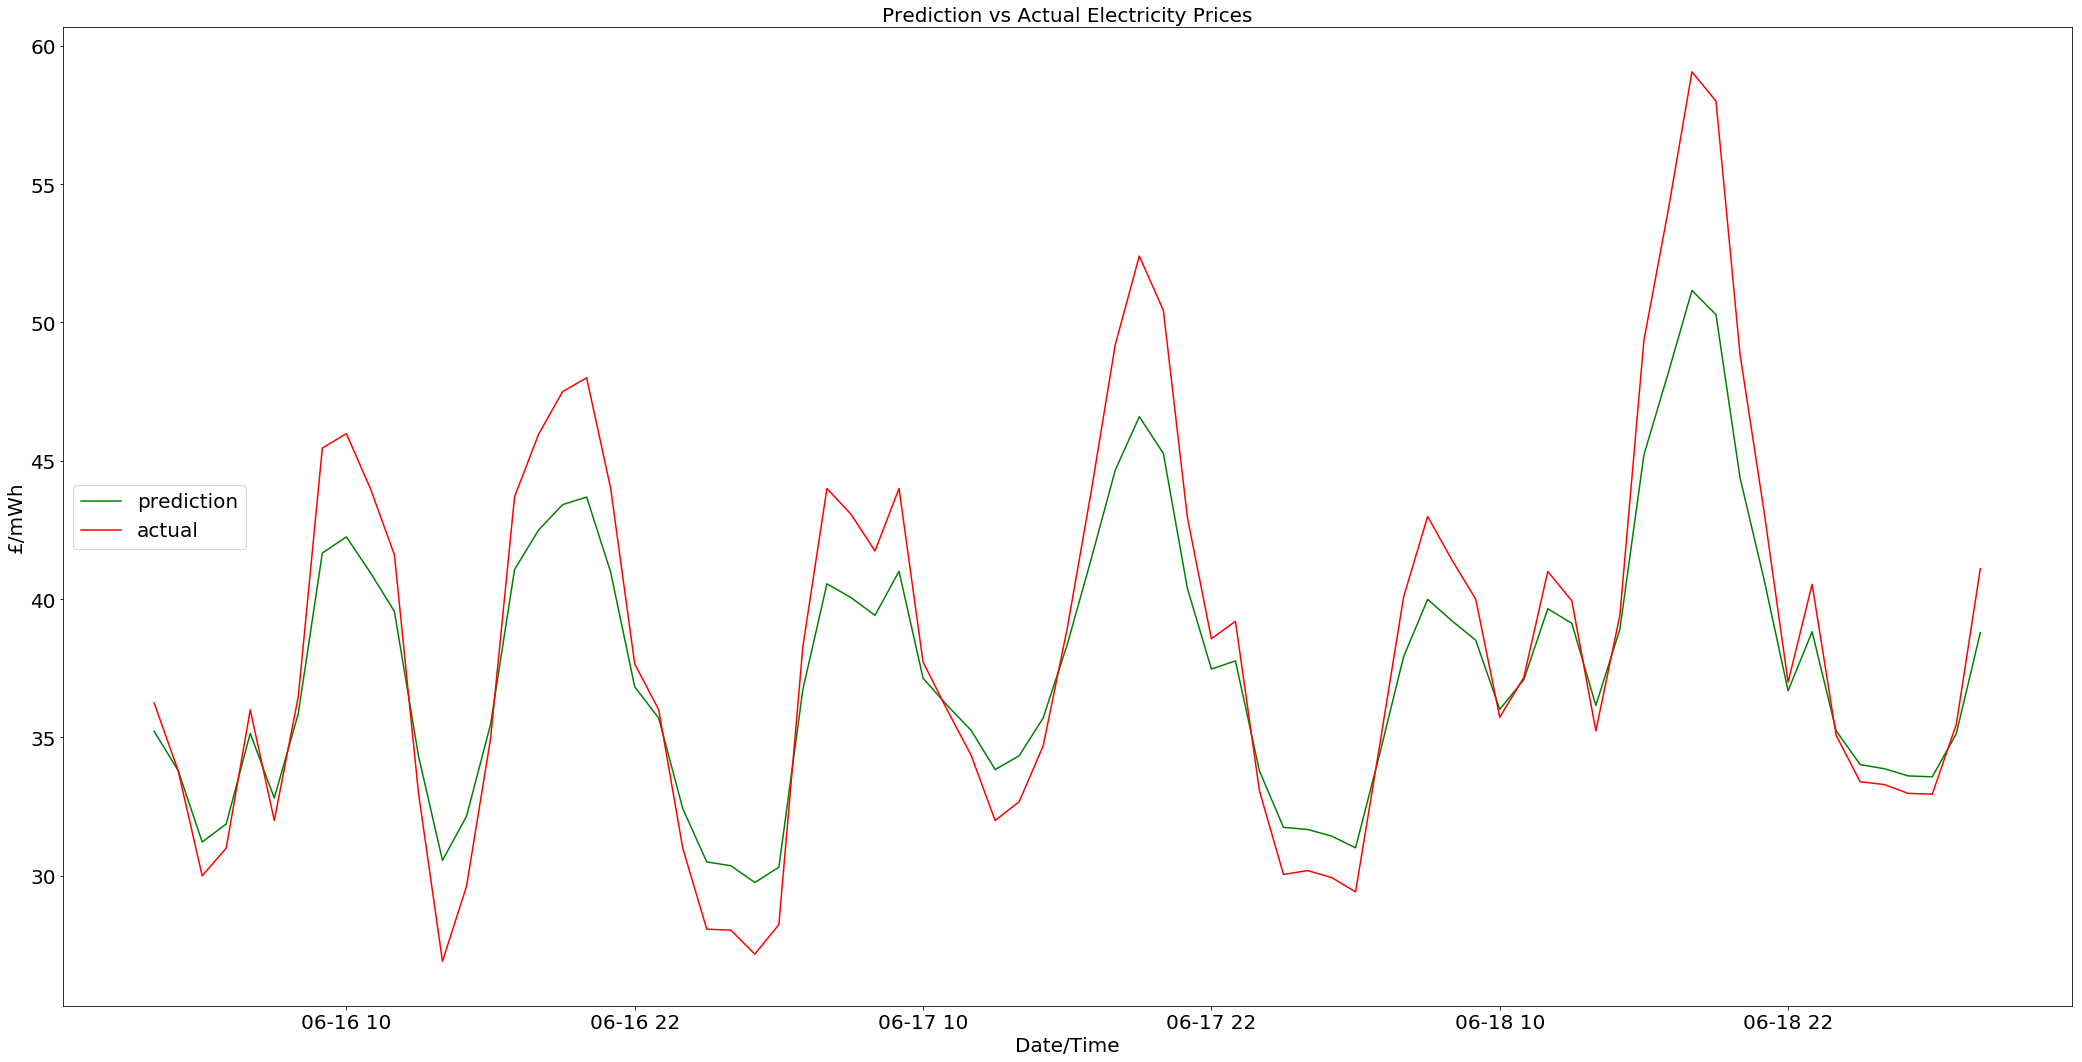

In [236]:
fig, ax = plt.subplots(figsize = (36,18))

ax.set_title('Prediction vs Actual Electricity Prices', fontsize=20)
ax.set_xlabel('Date/Time',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('£/mWh', fontsize=20)
ax.plot(plotting['prediction'][3995:4072], color = 'g')
ax.plot(plotting['actual'][3995:4072], color = 'r')
ax.legend(loc='center left', prop={'size': 20})



In [237]:
plotting.to_csv('final_prediction.csv')

In [244]:
# Best Prediction Saved